In [10]:
import numpy as np
import pandas as pd
from skimage.util.shape import view_as_windows
from skimage.io import imsave
from scipy.signal import hilbert
from zipfile import ZipFile
import librosa


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Estimated tempo: 123.05 beats per minute
[-0.0527244  -0.07391424 -0.06388376 ...  0.04306054  0.04818441
  0.        ]
22050


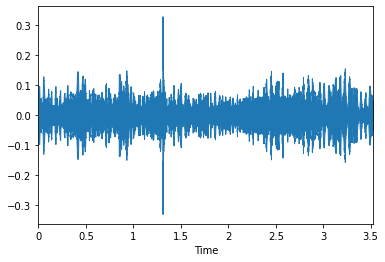

In [13]:
# Beat tracking example


# 1. Get the file path to an included audio example
filename = '/content/drive/MyDrive/Colab Notebooks/IA y AP/Proyecto/Audios/Atlantic Spotted Dolphin1.mp4'


# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

print(y)
print(sr)
import librosa.display
librosa.display.waveplot(y, sr= sr)

# Redes complejas
---

In [14]:
#vuelve el sampling a data frame
df = pd.DataFrame(y, columns=['Amplitude'])

df['segundos'] = [(1/sr)*i for i in range(len(df.index))]

print(df.head())
print(df.tail())

   Amplitude  segundos
0  -0.052724  0.000000
1  -0.073914  0.000045
2  -0.063884  0.000091
3  -0.057119  0.000136
4  -0.053538  0.000181
       Amplitude  segundos
77788   0.048745  3.527800
77789   0.045488  3.527846
77790   0.043061  3.527891
77791   0.048184  3.527937
77792   0.000000  3.527982


In [19]:
train_sounds = np.array([df['Amplitude'], df['segundos']])

# Calculate Complex trace
train_hilbert = np.zeros_like(train_sounds, dtype=np.complex)
for x in range(train_hilbert.shape[0]):
  train_hilbert[x,:] = hilbert(train_sounds[x,:])
print(train_hilbert)
print(train_hilbert.shape[0])

[[-5.27244024e-02 +0.15102178j -7.39142448e-02 +0.11108424j
  -6.38837591e-02 +0.0870168j  ...  4.30605449e-02 +0.09773396j
   4.81844060e-02 +0.13314196j -2.95520010e-17 +0.1671565j ]
 [-2.80589164e-16+12.00975401j  4.53514739e-05 +9.76374213j
   9.07029478e-05 +9.76374214j ...  3.52789116e+00 +9.76374214j
   3.52793651e+00 +9.76374213j  3.52798186e+00+12.00975401j]]
2


In [16]:
train_complex = train_hilbert
train_complex = train_hilbert-train_sounds
print(train_complex)

[[ 1.38777878e-17 +0.15102178j  8.32667268e-17 +0.11108424j
   0.00000000e+00 +0.0870168j  ...  0.00000000e+00 +0.09773396j
   0.00000000e+00 +0.13314196j -2.95520010e-17 +0.1671565j ]
 [-2.80589164e-16+12.00975401j  1.05292972e-15 +9.76374213j
   1.84920167e-15 +9.76374214j ...  4.44089210e-16 +9.76374214j
   0.00000000e+00 +9.76374213j -2.66453526e-15+12.00975401j]]


In [7]:
# Generate Patch Data
patch_size = 64 
patch_size = 64

stride = 8

patch_shape = (1, patch_size)

real_data = view_as_windows(train_sounds, patch_shape, step=stride)
cmplx_data = view_as_windows(train_complex, patch_shape, step=stride)

# Train - Validation Split
p = .9
val_split = np.random.choice(a=[False, True], size=real_data.shape[0:3], p=[p, 1-p])


In [8]:
real_data.shape

(1, 9717, 1, 64)

In [9]:
# Inline Data
real = []
cmplx = []

for a in range(real_data.shape[0]):
    for b in range(real_data.shape[1]):
      real.append(np.squeeze(real_data[a,b,0,:]).T)
      cmplx_patch = np.squeeze(cmplx_data[a,b,0,:]).T
      cmplx.append(np.stack([np.real(cmplx_patch), np.imag(cmplx_patch)], axis=1))

np.save('/content/drive/MyDrive/Colab Notebooks/IA y AP/Proyecto/patch_data/i_real.npy', real)
np.save('/content/drive/MyDrive/Colab Notebooks/IA y AP/Proyecto/patch_data/i_cmplx.npy', cmplx)


In [10]:
real[100]



array([0.0300238 , 0.03097486, 0.03352031, 0.03518232, 0.03836408,
       0.03622121, 0.03071598, 0.0328177 , 0.03321609, 0.03356876,
       0.0395683 , 0.04034847, 0.03745871, 0.03355726, 0.03404282,
       0.04043433, 0.0416871 , 0.03478502, 0.03107869, 0.03516421,
       0.03977209, 0.03928734, 0.0359646 , 0.04074219, 0.03939361,
       0.03101834, 0.03209956, 0.03193522, 0.02762403, 0.02727161,
       0.02908335, 0.03083206, 0.03411855, 0.03257955, 0.03475175,
       0.0364874 , 0.02814761, 0.02670887, 0.02724819, 0.02310423,
       0.03015084, 0.02815411, 0.02871366, 0.03095893, 0.02761962,
       0.03537353, 0.04135575, 0.03154948, 0.0282756 , 0.03461158,
       0.03204761, 0.03075099, 0.02784466, 0.02247487, 0.01727345,
       0.0214768 , 0.02134707, 0.02698608, 0.02672336, 0.0227478 ,
       0.02444361, 0.02687439, 0.02928397, 0.02556915])

Esta linea no tiene mucho sentido aqui por la dimension de mis datos que es de dos, para el caso de ellos si por que sis dimensiones es  3

In [ ]:
# Crossline Data
patch_shape = (patch_size, 1)

real_data = view_as_windows(train_sounds, patch_shape, step=stride)
cmplx_data = view_as_windows(train_complex, patch_shape, step=stride)

real = []
cmplx = []

for a in range(real_data.shape[0]):
    for b in range(real_data.shape[1]):
        for c in range(real_data.shape[2]):
            real.append(np.squeeze(real_data[a,b,c,:,0,:]).T)
            cmplx_patch = np.squeeze(cmplx_data[a,b,c,:,0,:]).T
            cmplx.append(np.stack([np.real(cmplx_patch), np.imag(cmplx_patch)], axis=2))

np.save('patch_data/x_real.npy', real)
np.save('patch_data/x_cmplx.npy', cmplx)

ValueError: ignored

In [11]:
!pip install keras==2.2.4


     |████████████████████████████████| 317kB 11.0MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [14]:



#%%
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="4,5,6,7"

import numpy as np
from sklearn.model_selection import train_test_split
###########################
from tensorflow.python.keras.layers.convolutional import Conv
###########################

import complexnn


from tensorflow.keras  import Model
from tensorflow.keras import optimizers
#from tensorflow.keras.utils import multi_gpu_model
###########################
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
###########################

act_fn = 'elu'


Using TensorFlow backend.


# 1 Abril 2021
---


In [1]:
!pip install keras-complex
!pip install tensorflow-gpu
%tensorflow_version 1.x
#es importante que se mire si realmente se deficnio tf version 1.x aveces toca reiniciar el enterno de ejecución

TensorFlow 1.x selected.


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#
print('===================\n===Data Loading====\n===================')
cmplx = np.load("/content/drive/MyDrive/Colab Notebooks/IA y AP/Proyecto/patch_data/i_cmplx.npy")
real = np.expand_dims(np.load('/content/drive/MyDrive/Colab Notebooks/IA y AP/Proyecto/patch_data/i_real.npy'),axis=2)

print('===================\n==Data Splitting==\n===================')
X_train_cmplx, X_test_cmplx, X_train_real, X_test_real = train_test_split(cmplx, real, test_size=0.25, random_state=42)
del(cmplx)
del(real)

===Data Loading====
==Data Splitting==


In [5]:
#vemos la forma de los datos
print(f'Parte real: {X_train_real.shape, X_test_real.shape}')
print(f'Parte imaginaria: {X_train_cmplx.shape, X_test_cmplx.shape}')

Parte real: ((7287, 64, 1), (2430, 64, 1))
Parte imaginaria: ((7287, 64, 2), (2430, 64, 2))


In [6]:
import complexnn

import keras
from keras import models
from keras import layers
from keras import optimizers

act_fn = 'elu'

model = models.Sequential()

def CAE(input_shape=None, x=0):
    
    # Block 1
    model.add(complexnn.conv.ComplexConv2D(2**(x+1), (3, 3), activation=act_fn, padding='same', input_shape=input_shape))
    model.add(complexnn.conv.ComplexConv2D(2**(x+1), (3, 3), strides=(2,2), activation=act_fn, padding='same'))
    model.add(complexnn.bn.ComplexBatchNormalization())
    model.add(complexnn.conv.ComplexConv2D(2**(x+2), (3, 3), strides=(2,2), activation=act_fn, padding='same'))
    model.add(complexnn.bn.ComplexBatchNormalization())
    model.add(complexnn.conv.ComplexConv2D(2**(x+3), (3, 3), strides=(2,2), activation=act_fn, padding='same'))
    model.add(complexnn.bn.ComplexBatchNormalization())
    #model.add(complexnn.conv.ComplexConv2D(2**(x+4), (3, 3), strides=(2,2), activation=act_fn, padding='same'))
    #model.add(complexnn.bn.ComplexBatchNormalization())
        
    model.add(complexnn.conv.ComplexConv2D(2**(x+5), (3, 3), activation=act_fn, padding='same'))
        
    model.add(complexnn.conv.ComplexConv2D(2**(x+4), (3, 3), strides=(2,2), transposed=True, activation=act_fn, padding='same'))
    model.add(complexnn.bn.ComplexBatchNormalization())
    model.add(complexnn.conv.ComplexConv2D(2**(x+3), (3, 3), strides=(2,2), transposed=True, activation=act_fn, padding='same'))
    model.add(complexnn.bn.ComplexBatchNormalization())
    model.add(complexnn.conv.ComplexConv2D(2**(x+2), (3, 3), strides=(2,2), transposed=True, activation=act_fn, padding='same'))
    model.add(complexnn.bn.ComplexBatchNormalization())
    model.add(complexnn.conv.ComplexConv2D(2**(x+1), 3, strides=(2,2), transposed=True, activation = act_fn, padding = 'same'))
    model.add(complexnn.bn.ComplexBatchNormalization())
    model.add(complexnn.conv.ComplexConv2D(2**(x+1), 3, activation = act_fn,  padding = 'same'))
    model.add(complexnn.conv.ComplexConv2D(1 , 3, activation = act_fn,  padding = 'same'))
    return model

def RAE(input_shape=None,x=0):
        
    model = models.Sequential()
    model.add(layers.Conv2D(2**(x+1), (3, 3), activation=act_fn, padding='same', kernel_initializer = 'he_normal', input_shape=input_shape))
    model.add(layers.Conv2D(2**(x+1), (3, 3), activation=act_fn, strides=(2,2), padding='same', kernel_initializer = 'he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(2**(x+2), (3, 3), activation=act_fn, strides=(2,2), padding='same', kernel_initializer = 'he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(2**(x+3), (3, 3), activation=act_fn, strides=(2,2), padding='same', kernel_initializer = 'he_normal'))
    model.add(layers.BatchNormalization())
    #model.add(layers.Conv2D(2**(x+4), (3, 3), activation=act_fn, strides=(2,2), padding='same', kernel_initializer = 'he_normal'))
    #model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(2**(x+5), (3, 3), activation=act_fn, padding='same', kernel_initializer = 'he_normal'))
    #model.add(layers.Conv2DTranspose(2**(x+4), (3, 3), activation=act_fn, strides=(2,2), padding='same', kernel_initializer = 'he_normal'))
    #model.add(layers.BatchNormalization())
    model.add(layers.Conv2DTranspose(2**(x+3), (3, 3), activation=act_fn, strides=(2,2), padding='same', kernel_initializer = 'he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2DTranspose(2**(x+2), (3, 3), activation=act_fn, strides=(2,2), padding='same', kernel_initializer = 'he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2DTranspose(2**(x+1), 3, activation=act_fn, strides=(2,2), padding='same', kernel_initializer = 'he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(2**(x+1), 3, activation=act_fn, padding='same', kernel_initializer = 'he_normal'))
    model.add(layers.Conv2D(1, (3, 3), activation=act_fn, padding='same', kernel_initializer = 'he_normal'))
    return model

def par_train(X_train,X_test,model,filename):
    #par_model = multi_gpu_model(model, gpus=4)
    par_model = model

    par_model.compile(optimizer=optimizers.Adam(), loss='mse', metrics=["mae"])

    csv_cb = keras.callbacks.CSVLogger('../logs/'+filename+'.csv')

    par_model.fit(X_train,
              X_train,
              epochs=100,
              verbose=2,
              batch_size=16,
              shuffle=True,
              validation_data=(X_test, X_test),
              callbacks=[csv_cb])

    par_model.save(filename+'.hd5')

def print_summary(model, filename):
    with open('/content/drive/MyDrive/Colab Notebooks/IA y AP/Proyecto/'+filename + '_report.txt','w') as fh:
        # Pass the file handle in as a lambda function to make it callable
        model.summary(print_fn=lambda x: fh.write(x + '\n'))


Using TensorFlow backend.


In [7]:
print('===================\n===Print Summary===\n===================')
#%%
print_summary(CAE((64,64,2),0), 'cmplx_mini')
print_summary(CAE((64,64,2),1), 'cmplx_small')
print_summary(CAE((64,64,2),2), 'cmplx_big')
print_summary(RAE((64,64,1),1), 'real_mini')
print_summary(RAE((64,64,1),2), 'real_small')
print_summary(RAE((64,64,1),3), 'real_big')

===Print Summary===
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


FailedPreconditionError: ignored

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0,2,3,4"

In [ ]:
#muestra las GPU conectadas
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16265998707331972529, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15161517604605650345
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7595854621792413233
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14949928141
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1076235609721948990
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [8]:
print('===================\n=======Train=======\n===================')
for common_seed in [33,42,12345,914872,552926,175937,528286]:
#for common_seed in [33,]:
    #from tensorflow import set_random_seed
    np.random.seed(common_seed)
    #set_random_seed(common_seed)

    import complexnn

    import keras
    from keras import models
    from keras import layers
    from keras import optimizers
    from keras.utils import multi_gpu_model

    #print('===================\n=====Train R 0====\n===================')
    #par_train(X_train_real, X_test_real,RAE((None,None,1),1),'real_mini') # Real Mini
    print('===================\n=====Train R S====\n===================')
    par_train(X_train_real, X_test_real,RAE((None,None,1),2),'real_small') # Real Small
    print('===================\n=====Train C S====\n===================')
    par_train(X_train_cmplx, X_test_cmplx,CAE((None,None,2),1),'cmplx_small') # Complex Small
    print('===================\n=====Train C L====\n===================')
    par_train(X_train_cmplx, X_test_cmplx,CAE((None,None,2),2),'cmplx_big') # Complex Large
    print('===================\n=====Train R L====\n===================')
    par_train(X_train_real, X_test_real,RAE((None,None,1),3),'real_large') # Real Large
    #print('===================\n=====Train C 0====\n===================')
    #par_train(X_train_cmplx, X_test_cmplx,CAE((None,None,2),0),'cmplx_mini') # Complex Mini

=======Train=======
=====Train R S====


ValueError: ignored

In [ ]:
X_train_real.shape

(7287, 64, 1)